Linear Regression is used to model the relationship between two variables by fitting a linear equation to given data where one variable is explanatory variable and the other is a dependent variable.

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (15, 10)
from mpl_toolkits.mplot3d import Axes3D

### Load the Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/data31.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualize the Data

Text(0.5, 1.0, 'Profit vs population')

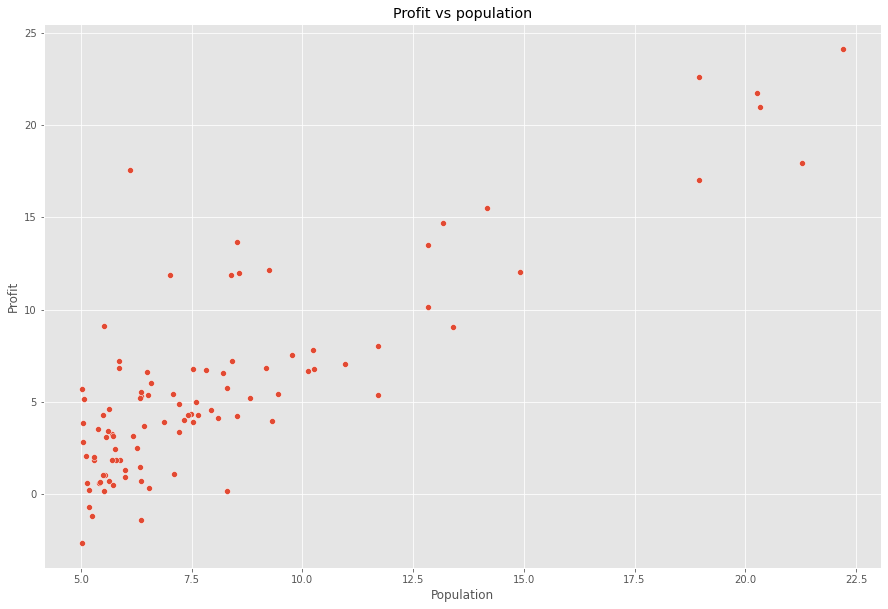

In [3]:
ax=sns.scatterplot(x='Population', y = 'Profit',data=data)
ax.set_title('Profit vs population')

### Compute the Cost 𝐽(𝜃)
The objective of linear regression is to minimize the cost function

In [4]:
def cost_function(X,y,theta):
    m=len(y)
    y_pred=X.dot(theta)
    error =( y_pred - y) **2
    
    return 1/(2*m) * np.sum(error)

m= data.Population.values.size
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y= data.Profit.values.reshape(m,1)
theta =np.zeros((2,1))
cost_function(X,y,theta)

32.072733877455676

### Implement Gradient Descent
Minimize the cost function 𝐽(𝜃)J(θ) by updating the below equation and repeat until convergence

In [5]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred-y))
        theta -= alpha * 1/m *error
        costs.append(cost_function(X,y,theta))
    return theta,costs
    
theta, costs = gradient_descent(X,y,theta,alpha=0.01,iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)),
                               str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


### Visualizing the Cost Function J(𝜃)

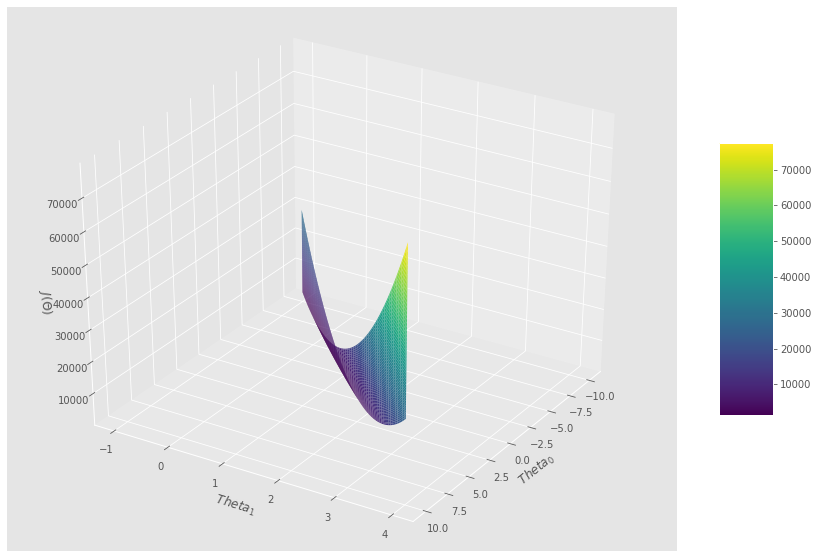

In [6]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
cost_values = np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        cost_values[i,j]= cost_function(X,y,t)
fig = plt.figure(figsize=(15,10))
ax= fig.gca(projection='3d')
surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5, aspect =5)
plt.xlabel('$\ Theta_0$')
plt.ylabel('$\ Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(32,32)
plt.show()

### Plotting the Convergence

Text(0, 0.5, '$J(\\Theta)$')

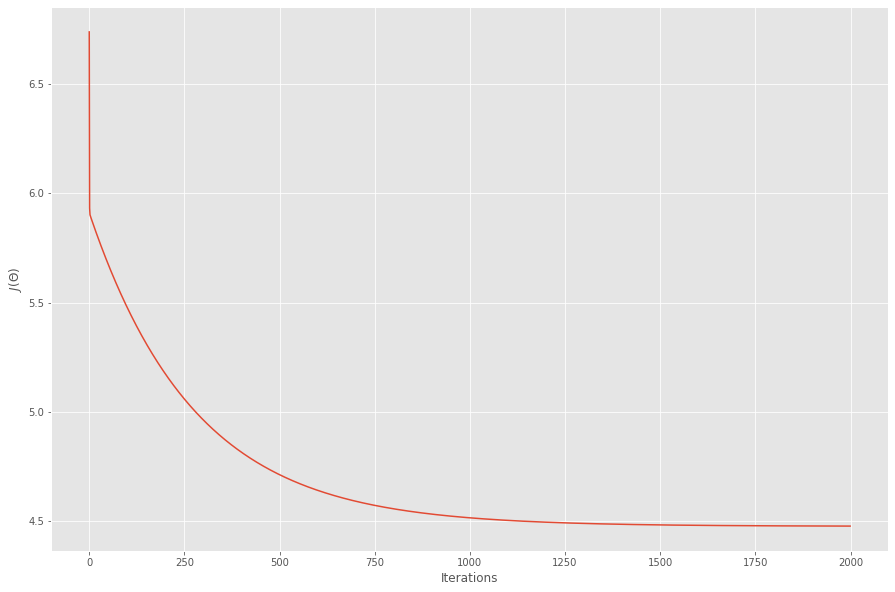

In [7]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')

### Training Data with Univariate Linear Regression Fit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Linear Regression Fit')

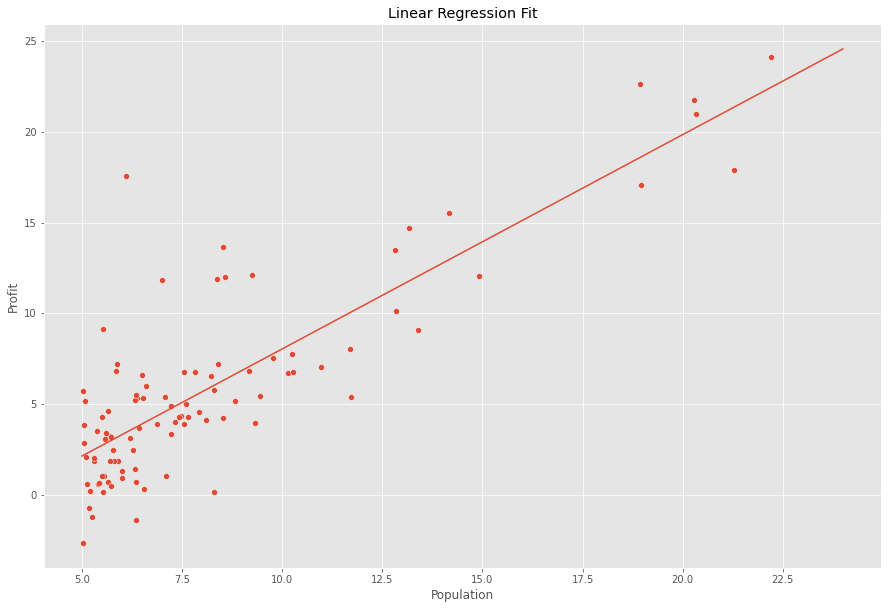

In [8]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population',y='Profit',data=data)
x_value = [x for x in range(5,25)]
y_value = [(x* theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression Fit')